In [1]:
import pandas as pd
import numpy as np
import math
import random 
import sklearn
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
#IMPORTAR LOS DATASETS DE CONJUNTOS, ENTRENAMIENTO Y PRUEBAS
Conjunto1 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/Conjunto1.csv")
Conjunto2 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/Conjunto2.csv")
Conjunto3 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/Conjunto3.csv")
Conjunto4 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/Conjunto4.csv")
Conjunto5 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/Conjunto5.csv")

dentrenamiento1 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/dentrenamientoC1.csv")
dentrenamiento2 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/dentrenamientoC2.csv")
dentrenamiento3 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/dentrenamientoC3.csv")
dentrenamiento4 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/dentrenamientoC4.csv")
dentrenamiento5 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/dentrenamientoC5.csv")

dprueba1 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/dpruebaC1.csv")
dprueba2 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/dpruebaC2.csv")
dprueba3 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/dpruebaC3.csv")
dprueba4 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/dpruebaC4.csv")
dprueba5 = pd.read_csv("C:/Users/Acer/Documents/DiplomadoAnalitica/dpruebaC5.csv")

In [3]:
#LISTA DE CONJUNTOS DE ENTRENAMIENTO
conjuntos_entrenamiento = [dentrenamiento1, dentrenamiento2, dentrenamiento3, dentrenamiento4, dentrenamiento5]

# conjunto 1

In [4]:
# Obtén los conjuntos de entrenamiento y prueba
X_entrenamiento = dentrenamiento1.drop('isFraud', axis=1).values #SEPARAR VARIABLES DE LA VARIABLE ISFRAUDE
y_entrenamiento = np.where(dentrenamiento1['isFraud'] == 'FRAUDE', 1, 0) #BINARIZAR IS FRAUDE

X_prueba = dprueba1.drop('isFraud', axis=1).values
y_prueba = np.where(dprueba1['isFraud'] == 'FRAUDE', 1, 0)

numero_de_caracteristicas = X_entrenamiento.shape[1] #GUARDA LA CANTIDAD DE VARIABLES QUE NO SON CLASE

In [5]:
# Crear el modelo
modelo = Sequential()
modelo.add(Dense(128, input_dim=numero_de_caracteristicas, activation='relu'))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dense(1, activation='linear'))

In [6]:
# Compilar el modelo
modelo.compile(loss='mean_squared_error', optimizer='adam')

In [7]:
# Entrenar el modelo
modelo.fit(X_entrenamiento, y_entrenamiento, epochs=10, batch_size=32)

Epoch 1/10
359/359 [==============================] - 2s 4ms/step - loss: 0.6291
Epoch 2/10
359/359 [==============================] - 2s 4ms/step - loss: 0.1779
Epoch 3/10
359/359 [==============================] - 2s 6ms/step - loss: 0.1248
Epoch 4/10
359/359 [==============================] - 1s 4ms/step - loss: 0.1270
Epoch 5/10
359/359 [==============================] - 2s 5ms/step - loss: 0.1184
Epoch 6/10
359/359 [==============================] - 2s 6ms/step - loss: 0.1081
Epoch 7/10
359/359 [==============================] - 2s 4ms/step - loss: 0.1080
Epoch 8/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1070
Epoch 9/10
359/359 [==============================] - 2s 5ms/step - loss: 0.1094
Epoch 10/10
359/359 [==============================] - 1s 4ms/step - loss: 0.1046


In [8]:
# Evaluar el modelo en los datos de prueba
puntuacion = modelo.evaluate(X_prueba, y_prueba)
print("Pérdida en los datos de prueba:", puntuacion)

154/154 [==============================] - 1s 3ms/step - loss: 0.1021
Pérdida en los datos de prueba: 0.1020905077457428


In [9]:
# Obtener las predicciones del modelo en los datos de prueba
predicciones = modelo.predict(X_prueba)

154/154 [==============================] - 1s 3ms/step


In [10]:
# Convertir las predicciones a etiquetas binarias (FRAUDE o no FRAUDE)
etiquetas_predichas = np.where(predicciones > 0.5, 1, 0)

In [11]:
# Comparar las etiquetas predichas con las verdaderas etiquetas
exactitud = np.mean(etiquetas_predichas == y_prueba)
print("Exactitud en los datos de prueba:", exactitud)

Exactitud en los datos de prueba: 0.49977881769652


In [12]:
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
matriz_confusion = confusion_matrix(y_prueba, etiquetas_predichas)
print("Matriz de confusión:")
print(matriz_confusion)

Matriz de confusión:
[[1928  538]
 [ 174 2277]]


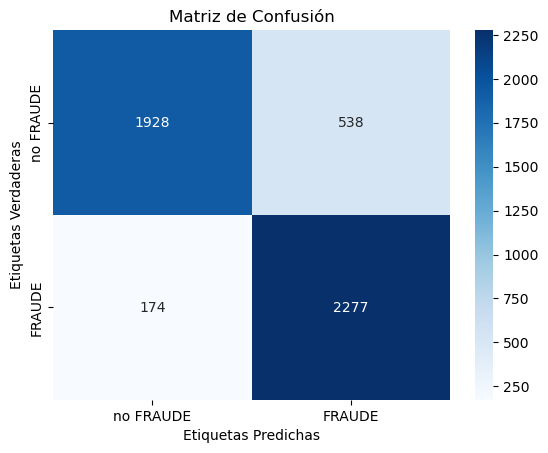

In [13]:
# Obtener la matriz de confusión
matriz_confusion = confusion_matrix(y_prueba, etiquetas_predichas)

# Crear el mapa de calor
sns.heatmap(matriz_confusion, annot=True, cmap='Blues', fmt='d')

# Configurar etiquetas de los ejes
clases = ['no FRAUDE', 'FRAUDE']
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.xticks(ticks=[0.5, 1.5], labels=clases)
plt.yticks(ticks=[0.5, 1.5], labels=clases)

# Mostrar el mapa de calor
plt.show()

In [14]:
# Calcular la exactitud
exactitud = accuracy_score(y_prueba, etiquetas_predichas)
print("Exactitud:", exactitud)

# Calcular la precisión
precision = precision_score(y_prueba, etiquetas_predichas)
print("Precisión:", precision)

# Calcular la sensibilidad (recall)
sensibilidad = recall_score(y_prueba, etiquetas_predichas)
print("Sensibilidad:", sensibilidad)

Exactitud: 0.8551962578808217
Precisión: 0.8088809946714032
Sensibilidad: 0.9290085679314566


# conjunto 2

In [15]:
# Obtén los conjuntos de entrenamiento y prueba
X_entrenamiento_2 = dentrenamiento2.drop('isFraud', axis=1).values #SEPARAR VARIABLES DE LA VARIABLE ISFRAUDE
y_entrenamiento_2 = np.where(dentrenamiento2['isFraud'] == 'FRAUDE', 1, 0) #BINARIZAR IS FRAUDE

X_prueba_2 = dprueba2.drop('isFraud', axis=1).values
y_prueba_2 = np.where(dprueba2['isFraud'] == 'FRAUDE', 1, 0)

numero_de_caracteristicas_2 = X_entrenamiento_2.shape[1] #GUARDA LA CANTIDAD DE VARIABLES QUE NO SON CLASE

In [16]:
# Crear el modelo
modelo_2 = Sequential()
modelo_2.add(Dense(128, input_dim=numero_de_caracteristicas_2, activation='relu'))
modelo_2.add(Dense(128, activation='relu'))
modelo_2.add(Dense(128, activation='relu'))
modelo_2.add(Dense(128, activation='relu'))
modelo_2.add(Dense(128, activation='relu'))
modelo_2.add(Dense(1, activation='linear'))

In [17]:
# Compilar el modelo
modelo_2.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
# Entrenar el modelo
modelo_2.fit(X_entrenamiento_2, y_entrenamiento_2, epochs=10, batch_size=32)

Epoch 1/10
359/359 [==============================] - 2s 3ms/step - loss: 4.2170
Epoch 2/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1466
Epoch 3/10
359/359 [==============================] - 2s 5ms/step - loss: 0.1270
Epoch 4/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1299
Epoch 5/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1432
Epoch 6/10
359/359 [==============================] - 2s 4ms/step - loss: 0.1271
Epoch 7/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1096
Epoch 8/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1105
Epoch 9/10
359/359 [==============================] - 3s 7ms/step - loss: 0.1140
Epoch 10/10
359/359 [==============================] - 1s 4ms/step - loss: 0.1103


In [19]:
# Evaluar el modelo en los datos de prueba
puntuacion_2 = modelo_2.evaluate(X_prueba_2, y_prueba_2)
print("Pérdida en los datos de prueba:", puntuacion_2)

154/154 [==============================] - 1s 2ms/step - loss: 0.0993
Pérdida en los datos de prueba: 0.09933755546808243


In [20]:
# Obtener las predicciones del modelo en los datos de prueba
predicciones_2 = modelo_2.predict(X_prueba_2)

154/154 [==============================] - 1s 3ms/step


In [21]:
# Convertir las predicciones a etiquetas binarias (FRAUDE o no FRAUDE)
etiquetas_predichas_2 = np.where(predicciones_2 > 0.5, 1, 0)

# Comparar las etiquetas predichas con las verdaderas etiquetas
exactitud_2 = np.mean(etiquetas_predichas_2 == y_prueba_2)
print("Exactitud en los datos de prueba:", exactitud_2)

Exactitud en los datos de prueba: 0.49934944069933895


In [22]:
# Obtener la matriz de confusión
matriz_confusion_2 = confusion_matrix(y_prueba_2, etiquetas_predichas_2)
print("Matriz de confusión:")
print(matriz_confusion_2)

Matriz de confusión:
[[2038  462]
 [ 231 2186]]


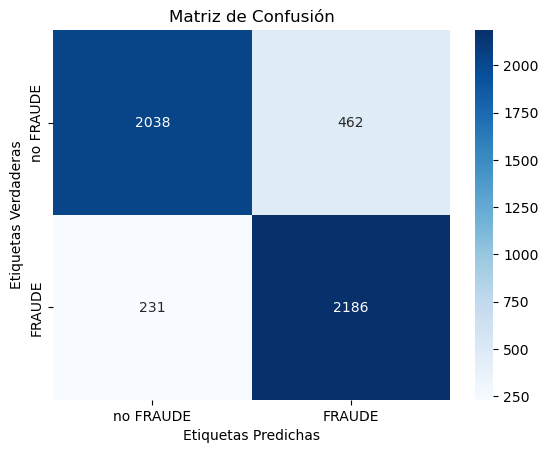

In [23]:
# Obtener la matriz de confusión
matriz_confusion_2 = confusion_matrix(y_prueba_2, etiquetas_predichas_2)

# Crear el mapa de calor
sns.heatmap(matriz_confusion_2, annot=True, cmap='Blues', fmt='d')

# Configurar etiquetas de los ejes
clases_2 = ['no FRAUDE', 'FRAUDE']
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.xticks(ticks=[0.5, 1.5], labels=clases_2)
plt.yticks(ticks=[0.5, 1.5], labels=clases_2)

# Mostrar el mapa de calor
plt.show()

In [24]:
# Calcular la exactitud
exactitud_2 = accuracy_score(y_prueba_2, etiquetas_predichas_2)
print("Exactitud:", exactitud_2)

# Calcular la precisión
precision_2 = precision_score(y_prueba_2, etiquetas_predichas_2)
print("Precisión:", precision_2)

# Calcular la sensibilidad (recall)
sensibilidad_2 = recall_score(y_prueba_2, etiquetas_predichas_2)
print("Sensibilidad:", sensibilidad_2)

Exactitud: 0.8590604026845637
Precisión: 0.8255287009063444
Sensibilidad: 0.9044269755895739


# Conjunto 3

In [25]:
# Obtén los conjuntos de entrenamiento y prueba
X_entrenamiento_3 = dentrenamiento3.drop('isFraud', axis=1).values #SEPARAR VARIABLES DE LA VARIABLE ISFRAUDE
y_entrenamiento_3 = np.where(dentrenamiento3['isFraud'] == 'FRAUDE', 1, 0) #BINARIZAR IS FRAUDE

X_prueba_3 = dprueba3.drop('isFraud', axis=1).values
y_prueba_3 = np.where(dprueba3['isFraud'] == 'FRAUDE', 1, 0)

numero_de_caracteristicas_3 = X_entrenamiento_3.shape[1] #GUARDA LA CANTIDAD DE VARIABLES QUE NO SON CLASE

In [26]:
# Crear el modelo
modelo_3 = Sequential()
modelo_3.add(Dense(128, input_dim=numero_de_caracteristicas_3, activation='relu'))
modelo_3.add(Dense(128, activation='relu'))
modelo_3.add(Dense(128, activation='relu'))
modelo_3.add(Dense(128, activation='relu'))
modelo_3.add(Dense(128, activation='relu'))
modelo_3.add(Dense(1, activation='linear'))

In [27]:
# Compilar el modelo
modelo_3.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
# Entrenar el modelo
modelo_3.fit(X_entrenamiento_3, y_entrenamiento_3, epochs=10, batch_size=32)

Epoch 1/10
359/359 [==============================] - 2s 3ms/step - loss: 1.4221
Epoch 2/10
359/359 [==============================] - 1s 3ms/step - loss: 0.2226
Epoch 3/10
359/359 [==============================] - 2s 5ms/step - loss: 0.1546
Epoch 4/10
359/359 [==============================] - 1s 4ms/step - loss: 0.1379
Epoch 5/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1442
Epoch 6/10
359/359 [==============================] - 2s 6ms/step - loss: 0.1285
Epoch 7/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1308
Epoch 8/10
359/359 [==============================] - 2s 4ms/step - loss: 0.1140
Epoch 9/10
359/359 [==============================] - 2s 6ms/step - loss: 0.1204
Epoch 10/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1160


In [29]:
# Evaluar el modelo en los datos de prueba
puntuacion_3 = modelo_3.evaluate(X_prueba_3, y_prueba_3)
print("Pérdida en los datos de prueba:", puntuacion_3)
# Obtener las predicciones del modelo en los datos de prueba
predicciones_3 = modelo_3.predict(X_prueba_3)

154/154 [==============================] - 0s 2ms/step - loss: 0.1044
Pérdida en los datos de prueba: 0.10436598211526871
154/154 [==============================] - 1s 3ms/step


In [30]:
# Convertir las predicciones a etiquetas binarias (FRAUDE o no FRAUDE)
etiquetas_predichas_3 = np.where(predicciones_3 > 0.5, 1, 0)

# Comparar las etiquetas predichas con las verdaderas etiquetas
exactitud_3 = np.mean(etiquetas_predichas_3 == y_prueba_3)
print("Exactitud en los datos de prueba:", exactitud_3)

Exactitud en los datos de prueba: 0.500312136933747


In [31]:
# Obtener la matriz de confusión
matriz_confusion_3 = confusion_matrix(y_prueba_3, etiquetas_predichas_3)
print("Matriz de confusión:")
print(matriz_confusion_3)

Matriz de confusión:
[[2027  410]
 [ 256 2224]]


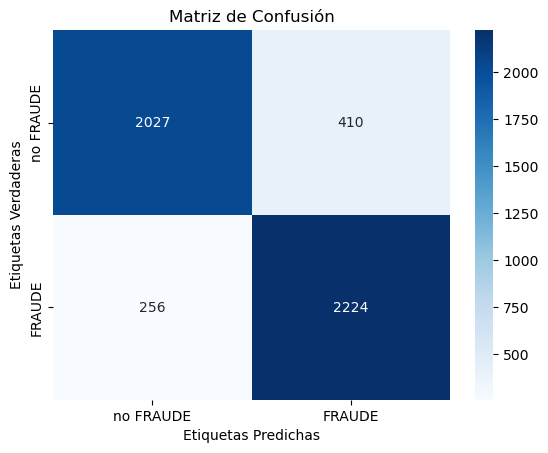

In [32]:
# Obtener la matriz de confusión
matriz_confusion_3 = confusion_matrix(y_prueba_3, etiquetas_predichas_3)

# Crear el mapa de calor
sns.heatmap(matriz_confusion_3, annot=True, cmap='Blues', fmt='d')

# Configurar etiquetas de los ejes
clases_3 = ['no FRAUDE', 'FRAUDE']
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.xticks(ticks=[0.5, 1.5], labels=clases_3)
plt.yticks(ticks=[0.5, 1.5], labels=clases_3)

# Mostrar el mapa de calor
plt.show()

In [33]:
# Calcular la exactitud
exactitud_3 = accuracy_score(y_prueba_3, etiquetas_predichas_3)
print("Exactitud:", exactitud_3)

# Calcular la precisión
precision_3 = precision_score(y_prueba_3, etiquetas_predichas_3)
print("Precisión:", precision_3)

# Calcular la sensibilidad (recall)
sensibilidad_3 = recall_score(y_prueba_3, etiquetas_predichas_3)
print("Sensibilidad:", sensibilidad_3)

Exactitud: 0.8645515558267236
Precisión: 0.8443432042520881
Sensibilidad: 0.896774193548387


# Conjunto 4

In [34]:
# Obtén los conjuntos de entrenamiento y prueba
X_entrenamiento_4 = dentrenamiento4.drop('isFraud', axis=1).values #SEPARAR VARIABLES DE LA VARIABLE ISFRAUDE
y_entrenamiento_4 = np.where(dentrenamiento4['isFraud'] == 'FRAUDE', 1, 0) #BINARIZAR IS FRAUDE

X_prueba_4 = dprueba4.drop('isFraud', axis=1).values
y_prueba_4 = np.where(dprueba4['isFraud'] == 'FRAUDE', 1, 0)

numero_de_caracteristicas_4 = X_entrenamiento_4.shape[1] #GUARDA LA CANTIDAD DE VARIABLES QUE NO SON CLASE

In [35]:
# Crear el modelo
modelo_4 = Sequential()
modelo_4.add(Dense(128, input_dim=numero_de_caracteristicas_4, activation='relu'))
modelo_4.add(Dense(128, activation='relu'))
modelo_4.add(Dense(128, activation='relu'))
modelo_4.add(Dense(128, activation='relu'))
modelo_4.add(Dense(128, activation='relu'))
modelo_4.add(Dense(1, activation='linear'))

In [36]:
# Compilar el modelo
modelo_4.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
# Entrenar el modelo
modelo_4.fit(X_entrenamiento_4, y_entrenamiento_4, epochs=10, batch_size=32)

Epoch 1/10
359/359 [==============================] - 2s 3ms/step - loss: 4.4343
Epoch 2/10
359/359 [==============================] - 1s 4ms/step - loss: 0.1649
Epoch 3/10
359/359 [==============================] - 2s 4ms/step - loss: 0.1381
Epoch 4/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1273
Epoch 5/10
359/359 [==============================] - 1s 4ms/step - loss: 0.1380
Epoch 6/10
359/359 [==============================] - 2s 5ms/step - loss: 0.1243
Epoch 7/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1233
Epoch 8/10
359/359 [==============================] - 2s 6ms/step - loss: 0.1327
Epoch 9/10
359/359 [==============================] - 1s 4ms/step - loss: 0.1139
Epoch 10/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1134


In [38]:
# Evaluar el modelo en los datos de prueba
puntuacion_4 = modelo_4.evaluate(X_prueba_4, y_prueba_4)
print("Pérdida en los datos de prueba:", puntuacion_4)
# Obtener las predicciones del modelo en los datos de prueba
predicciones_4 = modelo_4.predict(X_prueba_4)

154/154 [==============================] - 1s 4ms/step - loss: 0.0966
Pérdida en los datos de prueba: 0.09655079990625381
154/154 [==============================] - 1s 4ms/step


In [39]:
# Convertir las predicciones a etiquetas binarias (FRAUDE o no FRAUDE)
etiquetas_predichas_4 = np.where(predicciones_4 > 0.5, 1, 0)

# Comparar las etiquetas predichas con las verdaderas etiquetas
exactitud_4 = np.mean(etiquetas_predichas_4 == y_prueba_4)
print("Exactitud en los datos de prueba:", exactitud_4)

Exactitud en los datos de prueba: 0.5029430792357115


In [40]:
# Obtener la matriz de confusión
matriz_confusion_4 = confusion_matrix(y_prueba_4, etiquetas_predichas_4)
print("Matriz de confusión:")
print(matriz_confusion_4)

Matriz de confusión:
[[1696  712]
 [  58 2451]]


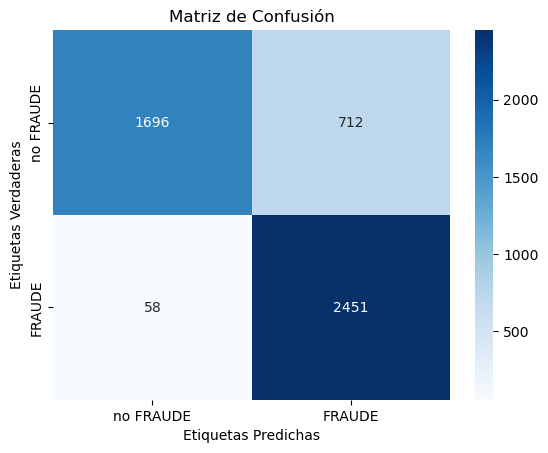

In [41]:
# Obtener la matriz de confusión
matriz_confusion_4 = confusion_matrix(y_prueba_4, etiquetas_predichas_4)

# Crear el mapa de calor
sns.heatmap(matriz_confusion_4, annot=True, cmap='Blues', fmt='d')

# Configurar etiquetas de los ejes
clases_4 = ['no FRAUDE', 'FRAUDE']
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.xticks(ticks=[0.5, 1.5], labels=clases_4)
plt.yticks(ticks=[0.5, 1.5], labels=clases_4)

# Mostrar el mapa de calor
plt.show()

In [42]:
# Calcular la exactitud
exactitud_4 = accuracy_score(y_prueba_4, etiquetas_predichas_4)
print("Exactitud:", exactitud_4)

# Calcular la precisión
precision_4 = precision_score(y_prueba_4, etiquetas_predichas_4)
print("Precisión:", precision_4)

# Calcular la sensibilidad (recall)
sensibilidad_4 = recall_score(y_prueba_4, etiquetas_predichas_4)
print("Sensibilidad:", sensibilidad_4)

Exactitud: 0.843400447427293
Precisión: 0.7748972494467278
Sensibilidad: 0.9768832204065365


# Conjunto 5

In [43]:
# Obtén los conjuntos de entrenamiento y prueba
X_entrenamiento_5 = dentrenamiento5.drop('isFraud', axis=1).values #SEPARAR VARIABLES DE LA VARIABLE ISFRAUDE
y_entrenamiento_5 = np.where(dentrenamiento5['isFraud'] == 'FRAUDE', 1, 0) #BINARIZAR IS FRAUDE

X_prueba_5 = dprueba5.drop('isFraud', axis=1).values
y_prueba_5 = np.where(dprueba5['isFraud'] == 'FRAUDE', 1, 0)

numero_de_caracteristicas_5 = X_entrenamiento_5.shape[1] #GUARDA LA CANTIDAD DE VARIABLES QUE NO SON CLASE

In [44]:
# Crear el modelo
modelo_5 = Sequential()
modelo_5.add(Dense(128, input_dim=numero_de_caracteristicas_5, activation='relu'))
modelo_5.add(Dense(128, activation='relu'))
modelo_5.add(Dense(128, activation='relu'))
modelo_5.add(Dense(128, activation='relu'))
modelo_5.add(Dense(128, activation='relu'))
modelo_5.add(Dense(1, activation='linear'))

In [45]:
# Compilar el modelo
modelo_5.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
# Entrenar el modelo
modelo_5.fit(X_entrenamiento_5, y_entrenamiento_5, epochs=10, batch_size=32)

Epoch 1/10
359/359 [==============================] - 2s 3ms/step - loss: 1.3618
Epoch 2/10
359/359 [==============================] - 1s 4ms/step - loss: 0.2038
Epoch 3/10
359/359 [==============================] - 2s 5ms/step - loss: 0.1338
Epoch 4/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1227
Epoch 5/10
359/359 [==============================] - 1s 3ms/step - loss: 0.1309
Epoch 6/10
359/359 [==============================] - 2s 4ms/step - loss: 0.1180
Epoch 7/10
359/359 [==============================] - 2s 6ms/step - loss: 0.1188
Epoch 8/10
359/359 [==============================] - 2s 5ms/step - loss: 0.1132
Epoch 9/10
359/359 [==============================] - 2s 5ms/step - loss: 0.1096
Epoch 10/10
359/359 [==============================] - 2s 5ms/step - loss: 0.1124


In [47]:
# Evaluar el modelo en los datos de prueba
puntuacion_5 = modelo_5.evaluate(X_prueba_5, y_prueba_5)
print("Pérdida en los datos de prueba:", puntuacion_5)
# Obtener las predicciones del modelo en los datos de prueba
predicciones_5 = modelo_5.predict(X_prueba_5)

154/154 [==============================] - 1s 3ms/step - loss: 0.1008
Pérdida en los datos de prueba: 0.10077700018882751
154/154 [==============================] - 1s 2ms/step


In [48]:
# Convertir las predicciones a etiquetas binarias (FRAUDE o no FRAUDE)
etiquetas_predichas_5 = np.where(predicciones_5 > 0.5, 1, 0)

# Comparar las etiquetas predichas con las verdaderas etiquetas
exactitud_5 = np.mean(etiquetas_predichas_5 == y_prueba_5)
print("Exactitud en los datos de prueba:", exactitud_5)

Exactitud en los datos de prueba: 0.4999739627377203


In [49]:
# Obtener la matriz de confusión
matriz_confusion_5 = confusion_matrix(y_prueba_5, etiquetas_predichas_5)
print("Matriz de confusión:")
print(matriz_confusion_5)

Matriz de confusión:
[[1770  689]
 [  59 2399]]


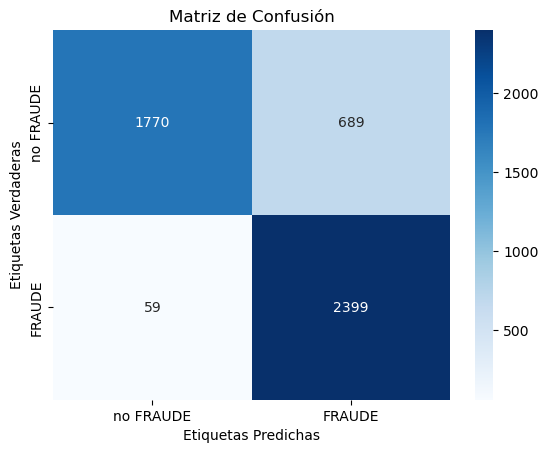

In [50]:
# Obtener la matriz de confusión
matriz_confusion_5 = confusion_matrix(y_prueba_5, etiquetas_predichas_5)

# Crear el mapa de calor
sns.heatmap(matriz_confusion_5, annot=True, cmap='Blues', fmt='d')

# Configurar etiquetas de los ejes
clases_5 = ['no FRAUDE', 'FRAUDE']
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.xticks(ticks=[0.5, 1.5], labels=clases_5)
plt.yticks(ticks=[0.5, 1.5], labels=clases_5)

# Mostrar el mapa de calor
plt.show()

In [51]:
# Calcular la exactitud
exactitud_5 = accuracy_score(y_prueba_5, etiquetas_predichas_5)
print("Exactitud:", exactitud_5)

# Calcular la precisión
precision_5 = precision_score(y_prueba_5, etiquetas_predichas_5)
print("Precisión:", precision_5)

# Calcular la sensibilidad (recall)
sensibilidad_5 = recall_score(y_prueba_5, etiquetas_predichas_5)
print("Sensibilidad:", sensibilidad_5)

Exactitud: 0.8478747203579419
Precisión: 0.7768782383419689
Sensibilidad: 0.9759967453213995
